In [84]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [85]:
# Define directories for training and testing data
base_dir = 'archive'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [86]:
# Define image dimensions and batch size
img_width, img_height = 32, 32
batch_size = 16

In [87]:
# Create ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [88]:
# Generate training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


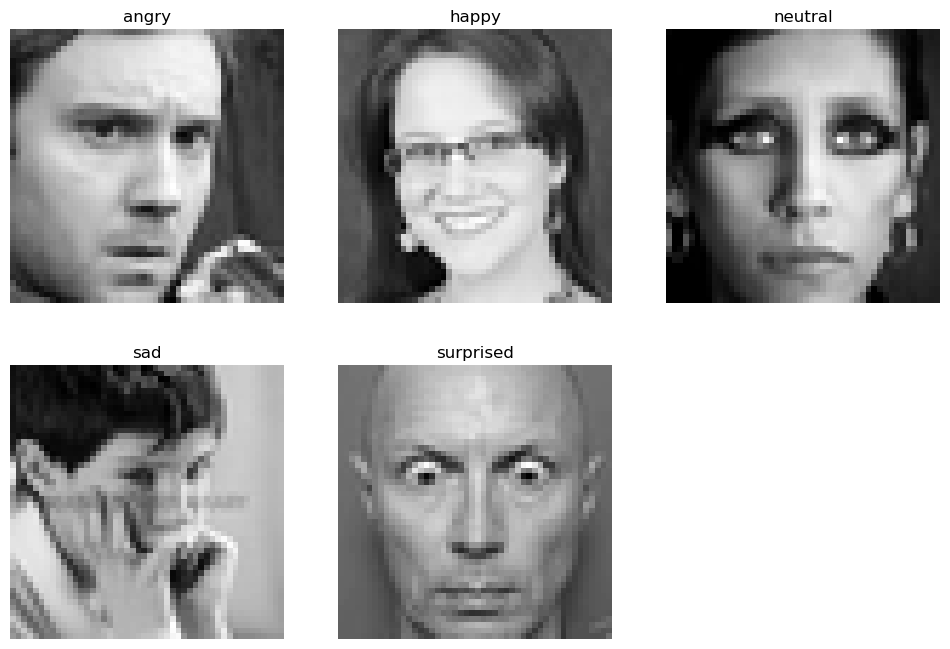

In [89]:
# Display sample images for different emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'surprised']

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(emotions, start=1):
    img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.show()

In [90]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [91]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [92]:
# Add your own classifier layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [93]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
filepath = r'C:\Users\SOUMYADEEP\Desktop\Emotion\emotion23.keras' 
model_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)

In [95]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/100


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "block1_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 32, 32, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
# Plotting loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    emotion_labels = ['angry', 'happy', 'neutral', 'sad', 'surprised']
    predicted_class = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion

In [ ]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/happy/im17.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict emotion for the specified image
prediction = predict_emotion('archive/test/happy/im17.png')
print("Predicted Emotion:", prediction)

In [ ]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/neutral/im292.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/neutral/im292.png')
print("Predicted Emotion:", prediction)

In [ ]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/surprised/im141.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/surprised/im141.png')
print("Predicted Emotion:", prediction)

In [ ]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/sad/im1060.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/sad/im1060.png')
print("Predicted Emotion:", prediction)

In [ ]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/angry/im204.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/angry/im204.png')
print("Predicted Emotion:", prediction)